<a href="https://colab.research.google.com/github/Luferath/Colabnotes/blob/main/semi_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: aprendizado semi-supervisionado

Uma indústria de laticínios precisa assegurar a qualidade do leite para produzir seus produtos.

Neste projeto, iremos analisar características de amostras de leite para identificar a qualidade e verificar se podem ser utilizados na produção dos produtos alimentícios.

O machine learning será utilizado para fazer a **classificação** do leite entre as qualidades **baixa, média e alta**.

O primeiro passo é fazer a leitura da base de dados, a partir do arquivo `qualidade_leite.csv`. Vamos fazer a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) da biblioteca `pandas`.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/qualidade_leite.csv')

In [ ]:
dados

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
4,6.6,37,0,0,0,0,255,média
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN
1057,6.8,43,1,0,1,0,250,NaN


### Explorando os dados

Vamos explorar os nossos dados usando o método `info()` para fazer a identificação de dados nulos em cada coluna, identificar se os tipos das colunas estão em formato numérico e verificar a presença de valores discrepantes com o `describe()`.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperatura  1059 non-null   int64  
 2   Sabor        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Gordura      1059 non-null   int64  
 5   Turbidez     1059 non-null   int64  
 6   Cor          1059 non-null   int64  
 7   Qualidade    424 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
dados['Qualidade'].value_counts(dropna=False)

NaN      635
baixa    184
média    149
alta      91
Name: Qualidade, dtype: int64

In [ ]:
dados.describe()

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## Abordagem supervisionada

Uma forma de solucionar o nosso problema de negócio é utilizar a abordagem supervisionada com apenas os dados rotulados. Podemos remover os dados que não possuem rótulos e construir um modelo de classificação a partir dos dados restantes.

### Selecionando dados rotulados

In [ ]:
dados_rotulados = dados.dropna()

In [ ]:
dados_rotulados

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
0,6.6,35,1,0,1,0,254,alta
1,6.6,36,0,1,0,1,253,alta
4,6.6,37,0,0,0,0,255,média
6,5.5,45,1,0,1,1,250,baixa
7,4.5,60,0,1,1,1,250,baixa
...,...,...,...,...,...,...,...,...
1047,6.8,45,1,1,1,0,245,alta
1048,9.5,34,1,1,0,1,255,baixa
1049,6.5,37,0,0,0,0,255,média
1052,6.5,40,1,0,0,0,250,média


Com os dados não rotulados removidos, vamos separar as variáveis explicativas (x) da variável alvo (y).

In [ ]:
x = dados_rotulados.drop('Qualidade', axis = 1)
y = dados_rotulados['Qualidade']

In [ ]:
dados_rotulados['Qualidade'].value_counts(dropna=False)

baixa    184
média    149
alta      91
Name: Qualidade, dtype: int64

### Preparando os dados

Antes de construir o modelo, precisamos realizar algumas transformações nos dados. A variável alvo precisa estar em um formato numérico, portanto vamos usar o `LabelEncoder` para fazer a transformação.

Além disso, vamos usar o modelo SVM, que é um algoritmo que calcula distâncias, portanto é sensível a escala das variáveis. Vamos realizar a normalização das variáveis para não comprometer o resultado do modelo.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1,
       1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0,

In [ ]:
label_encoder.inverse_transform([0, 1, 2])

array(['alta', 'baixa', 'média'], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_normalizado = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x_normalizado

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.553846,0.017857,1.0,0.0,1.0,0.0,0.933333
1,0.553846,0.035714,0.0,1.0,0.0,1.0,0.866667
2,0.553846,0.053571,0.0,0.0,0.0,0.0,1.000000
3,0.384615,0.196429,1.0,0.0,1.0,1.0,0.666667
4,0.230769,0.464286,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
419,0.584615,0.196429,1.0,1.0,1.0,0.0,0.333333
420,1.000000,0.000000,1.0,1.0,0.0,1.0,1.000000
421,0.538462,0.053571,0.0,0.0,0.0,0.0,1.000000
422,0.538462,0.107143,1.0,0.0,0.0,0.0,0.666667


### Criando um modelo supervisionado

Para validar o desempenho do modelo, precisamos utilizar um conjunto de dados de treinamento e outro de teste, vamos fazer a separação desses dados e depois treinar o modelo.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, random_state = 10)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = 'linear', random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', random_state=10)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_previsto = svm.predict(x_teste)
resultados_svm = classification_report(y_teste, y_previsto)
print(resultados_svm)

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106



## Aprendizado semi-supervisionado

O ponto negativo de utilizar a abordagem supervisionada, removendo os dados sem rótulos, é que há uma perda muito grande de informações que podem ser úteis para o entendimento do problema. O modelo cria uma regra com poucas informações, o que pode torná-lo muito simples.

O aprendizado semi-supervisionado visa utilizar as informações dos dados rotulados e não rotulados, para que busque o padrão em mais dados.

A primeira estratégia que vamos utilizar é a **Pseudo labeling**, em que fazemos a previsão dos resultados com o modelo supervisionado e a partir dos resultados das previsões, teremos pseudo rótulos, que não são os resultados reais, mas são possíveis resultados. A partir deles, treinamos um novo modelo com todos os dados.

### Fazendo previsões

In [ ]:
dados[dados['Qualidade'].isna()]

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor,Qualidade
2,8.5,70,1,1,1,1,246,NaN
3,9.5,34,1,1,0,1,255,NaN
5,6.6,37,1,1,1,1,255,NaN
8,8.1,66,1,0,1,1,255,NaN
10,6.7,45,1,1,1,0,245,NaN
...,...,...,...,...,...,...,...,...
1053,8.1,66,1,0,1,1,255,NaN
1054,6.7,45,1,1,0,0,247,NaN
1055,6.7,38,1,0,1,0,255,NaN
1056,3.0,40,1,1,1,1,255,NaN


In [ ]:
dados_sem_rotulo = dados[dados['Qualidade'].isna()].drop('Qualidade', axis = 1)

In [ ]:
dados_sem_rotulo_normalizados = pd.DataFrame(scaler.transform(dados_sem_rotulo), columns = dados_sem_rotulo.columns)

In [ ]:
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

In [ ]:
y_previsto

array([1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,

### Pseudo labeling

In [ ]:
novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
novo_x_treino

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
949,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
950,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
951,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [ ]:
novo_y_treino = pd.concat([pd.Series(y_treino), pd.Series(y_previsto)], ignore_index = True)
novo_y_treino

0      2
1      2
2      2
3      0
4      0
      ..
948    1
949    1
950    0
951    1
952    2
Length: 953, dtype: int64

In [ ]:
pseudo_labeling = SVC(kernel = 'linear', random_state = 10)
pseudo_labeling.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', random_state=10)

In [ ]:
novo_y_previsto = pseudo_labeling.predict(x_teste)
resultados_pseudo_labeling = classification_report(y_teste, novo_y_previsto)

In [ ]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Pseudo Labeling')
print(resultados_pseudo_labeling)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Pseudo Labeling
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.66      0.87      0.75        46
           2       0.88      0.76      0.81        37

    accuracy                           0.73       106
   macro avg       0.74      0.67      0.69       106
weighted avg       0.74      0.73      0.72       106



## Self-training

A estratégia do Pseudo Labeling não vai trazer resultados muito satisfatórios porque utiliza um modelo simples para fazer a previsão de um conjunto de dados muito maior do que a quantidade de dados de treinamento, trazendo uma incerteza do modelo para os novos resultados.

Podemos utilizar uma abordagem conhecida como **Self Training**, que vai utilizar somente os resultados com maior confiança na previsão para gerar um novo modelo, ao invés de utilizar todas as previsões.

Para isso, precisamos criar o nosso modelo SVM com uma configuração adicional, que retorna a probabilidade da previsão do modelo.



### Tabela de probabilidades

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, stratify = y, random_state = 10)

In [ ]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(x_treino, y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [ ]:
probabilidades = svm.predict_proba(dados_sem_rotulo_normalizados)
y_previsto = svm.predict(dados_sem_rotulo_normalizados)

In [ ]:
tabela_resultados = pd.DataFrame(probabilidades, columns = ['Prob C0', 'Prob C1', 'Prob C2'])
tabela_resultados['Previsão'] = y_previsto
tabela_resultados['Probabilidade máxima'] = tabela_resultados[['Prob C0', 'Prob C1', 'Prob C2']].max(axis = 1)

In [ ]:
tabela_resultados

,Prob C0,Prob C1,Prob C2,Previsão,Probabilidade máxima
0,0.147210,0.852259,0.000531,1,0.852259
1,0.249874,0.715117,0.035009,1,0.715117
2,0.491701,0.506534,0.001764,1,0.506534
3,0.076294,0.922552,0.001155,1,0.922552
4,0.693914,0.215723,0.090363,0,0.693914
...,...,...,...,...,...
630,0.076294,0.922552,0.001155,1,0.922552
631,0.130915,0.459888,0.409197,1,0.459888
632,0.540366,0.195320,0.264314,0,0.540366
633,0.255691,0.743873,0.000436,1,0.743873


### Selecionando rótulos com maior confiança

<Axes: ylabel='Frequency'>

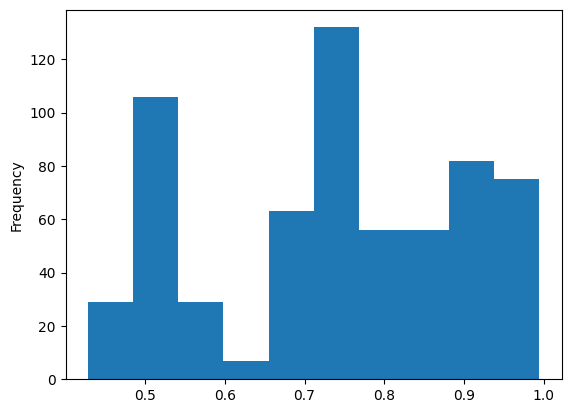

In [ ]:
tabela_resultados['Probabilidade máxima'].plot(kind = 'hist')

In [ ]:
tabela_resultados['Probabilidade máxima'] > 0.75

0       True
1      False
2      False
3       True
4      False
       ...  
630     True
631    False
632    False
633    False
634    False
Name: Probabilidade máxima, Length: 635, dtype: bool

In [ ]:
filtro_confianca = tabela_resultados['Probabilidade máxima'] > 0.75
novo_x_treino = pd.concat([x_treino, dados_sem_rotulo_normalizados[filtro_confianca]])
novo_y_treino = pd.concat([pd.Series(y_treino), tabela_resultados.loc[filtro_confianca, 'Previsão']])

### Modelo aprimorado

In [ ]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(novo_x_treino, novo_y_treino)

SVC(kernel='linear', probability=True, random_state=10)

In [ ]:
novo_y_previsto = svm.predict(x_teste)
resultados_self_training1 = classification_report(y_teste, novo_y_previsto)

In [ ]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106



### Modelo Self Training

In [ ]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [ ]:
pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
630   -1
631   -1
632   -1
633   -1
634   -1
Length: 635, dtype: int64

In [ ]:
x_treino_self_training = pd.concat([x_treino, dados_sem_rotulo_normalizados], ignore_index = True)
y_treino_self_training = pd.concat([pd.Series(y_treino), pd.Series([-1]*dados_sem_rotulo_normalizados.shape[0])], ignore_index = True)

In [ ]:
x_treino_self_training

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,0.584615,0.017857,1.0,0.0,1.0,0.0,0.400000
1,0.538462,0.035714,0.0,0.0,0.0,0.0,0.466667
2,0.538462,0.017857,1.0,0.0,1.0,0.0,0.400000
3,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
4,0.553846,0.196429,0.0,1.0,1.0,1.0,0.666667
...,...,...,...,...,...,...,...
948,0.784615,0.571429,1.0,0.0,1.0,1.0,1.000000
949,0.569231,0.196429,1.0,1.0,0.0,0.0,0.466667
950,0.569231,0.071429,1.0,0.0,1.0,0.0,1.000000
951,0.000000,0.107143,1.0,1.0,1.0,1.0,1.000000


In [ ]:
y_treino_self_training

0      2
1      2
2      2
3      0
4      0
      ..
948   -1
949   -1
950   -1
951   -1
952   -1
Length: 953, dtype: int64

In [ ]:
svm = SVC(kernel = 'linear', probability= True, random_state = 10)
self_training = SelfTrainingClassifier(svm, threshold = 0.80, max_iter = 15, verbose = True)

In [ ]:
self_training.fit(x_treino_self_training, y_treino_self_training)

End of iteration 1, added 244 new labels.
End of iteration 2, added 105 new labels.
End of iteration 3, added 50 new labels.
End of iteration 4, added 3 new labels.
End of iteration 5, added 14 new labels.


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                          random_state=10),
                       max_iter=15, threshold=0.8, verbose=True)

In [ ]:
y_previsto = self_training.predict(x_teste)
resultados_self_training = classification_report(y_teste, y_previsto)

In [ ]:
print('SVM Supervisionado')
print(resultados_svm)
print('-'*50)
print('SVM Self Training 1º estágio')
print(resultados_self_training1)
print('-'*50)
print('SVM Self Training')
print(resultados_self_training)

SVM Supervisionado
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.67      0.91      0.77        46
           2       0.90      0.76      0.82        37

    accuracy                           0.75       106
   macro avg       0.77      0.69      0.70       106
weighted avg       0.77      0.75      0.73       106

--------------------------------------------------
SVM Self Training 1º estágio
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.72      0.91      0.81        46
           2       0.92      0.89      0.90        37

    accuracy                           0.79       106
   macro avg       0.80      0.73      0.74       106
weighted avg       0.80      0.79      0.78       106

--------------------------------------------------
SVM Self Training
              precision    recall  f1-score   support

           0   

## Algoritmo de grafos


### Label Propagation

In [ ]:
from sklearn.semi_supervised import LabelPropagation

In [ ]:
label_propagation = LabelPropagation()

In [ ]:
label_propagation.fit(x_treino_self_training, y_treino_self_training)

LabelPropagation()

In [ ]:
y_previsto = label_propagation.predict(x_teste)
resultados_label_propagation = classification_report(y_teste, y_previsto)

In [ ]:
print('SVM Self Training')
print(resultados_self_training)
print('-'*50)
print('Label Propagation')
print(resultados_label_propagation)

SVM Self Training
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        23
           1       0.81      0.91      0.86        46
           2       0.92      0.89      0.90        37

    accuracy                           0.85       106
   macro avg       0.85      0.82      0.83       106
weighted avg       0.85      0.85      0.85       106

--------------------------------------------------
Label Propagation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.89      0.94        46
           2       0.88      0.95      0.91        37

    accuracy                           0.93       106
   macro avg       0.93      0.95      0.94       106
weighted avg       0.94      0.93      0.93       106



### Armazenar o resultado do melhor modelo

In [ ]:
import pickle

In [ ]:
with open('min_max_scaler.pkl', 'wb') as arquivo:
    pickle.dump(scaler, arquivo)

In [ ]:
with open('modelo_label_propagation.pkl', 'wb') as arquivo:
    pickle.dump(label_propagation, arquivo)

In [ ]:
modelo_min_max = pd.read_pickle('/content/min_max_scaler.pkl')
modelo_label_propagation = pd.read_pickle('/content/modelo_label_propagation.pkl')

```
novo_dado = {
    'pH':[6.4],
    'Temperatura':[52],
    'Sabor':[0],
    'Odor':[1],
    'Gordura':[1],
    'Turbidez':[0],
    'Cor':[253]
}
```

In [ ]:
novo_dado = {
    'pH':[6.4],
    'Temperatura':[52],
    'Sabor':[0],
    'Odor':[1],
    'Gordura':[1],
    'Turbidez':[0],
    'Cor':[253]
}

In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,pH,Temperatura,Sabor,Odor,Gordura,Turbidez,Cor
0,6.4,52,0,1,1,0,253


In [ ]:
novo_dado = modelo_min_max.transform(novo_dado)
modelo_label_propagation.predict(novo_dado)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LabelPropagation was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
label_encoder.inverse_transform([0])

array(['alta'], dtype=object)